<a href="https://colab.research.google.com/github/anggithaycs/undergrad-thesis/blob/codes/%5BTA%5D_2_Preprocessing_Translated_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#importing NLTK
!pip install nltk

In [ ]:
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

#Reading data
Data yang sudah diterjemahkan

In [ ]:
df = pd.read_csv("drive/My Drive/TA Lama/df_translated.csv")

In [ ]:
df['review_text'][0]

'tabir surya termahal yang pernah gue beli ini kayanya. tapi worth it sih dan pasti akan beli lagi. sukanya sama suncreen ini: - spf tinggi - jangan meninggalkan gips putih. menyatu dengan sempurna ke dalam kulit - nggak membuat muka berminyak - very light - tidak menyumbat pori-pori produk ini berhasil membuat gue jadi mau pakai sunscreen :)'

#**Data Analysis**

##Data Distribution

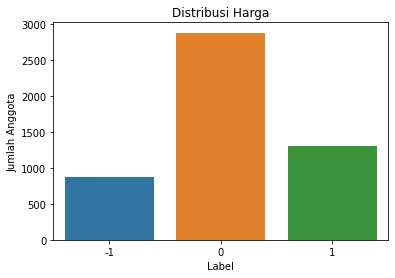

In [ ]:
sns.countplot(x='harga', data=df)
    
plt.title('Distribusi Harga')
plt.ylabel('Jumlah Anggota')
plt.xlabel('Label')
plt.show()

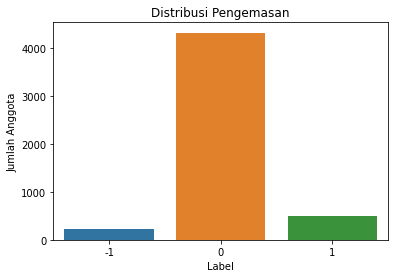

In [ ]:
sns.countplot(x='pengemasan', data=df)
    
plt.title('Distribusi Pengemasan')
plt.ylabel('Jumlah Anggota')
plt.xlabel('Label')
plt.show()

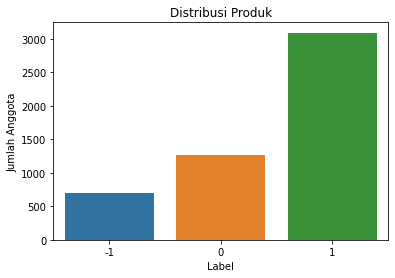

In [ ]:
sns.countplot(x='produk', data=df)
    
plt.title('Distribusi Produk')
plt.ylabel('Jumlah Anggota')
plt.xlabel('Label')
plt.show()

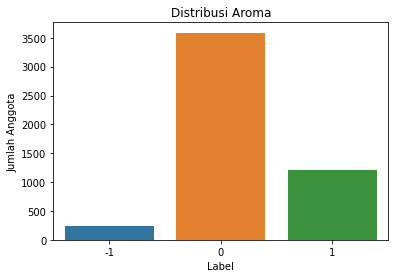

In [ ]:
sns.countplot(x='aroma', data=df)
    
plt.title('Distribusi Aroma')
plt.ylabel('Jumlah Anggota')
plt.xlabel('Label')
plt.show()

##Word Distribution

**Dilihat dari persebaran top 20 most common words, hanya satu kata yang bisa tergolong ke penentuan sentimen yaitu kata 'suka', sedangkan sebagian besar lainnya adalah stopwords.**

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

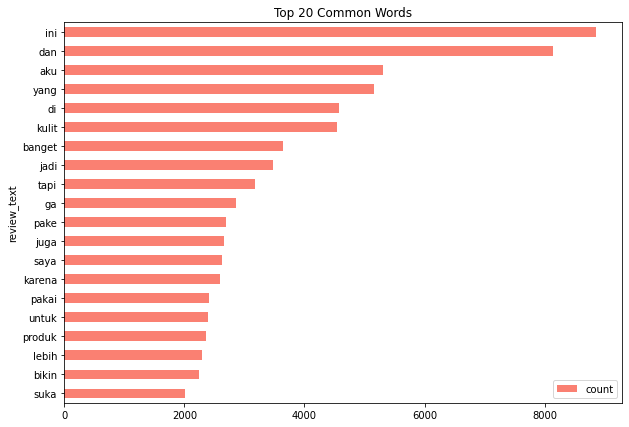

In [ ]:
common_words_ = get_top_n_words(df['review_text'], 20)
top_word = pd.DataFrame(common_words_, columns = ['review_text' , 'count'])
fig, ax = plt.subplots(figsize=(10, 7))

# Plot horizontal bar graph
top_word.sort_values(by='count').plot(kind ='barh', x ='review_text', y ='count', ax = ax, color="salmon")
ax.set_title("Top 20 Common Words")
plt.show()

#**Preprocessing**

###Remove special characters and punctuation

In [ ]:
def cleaning(data):
    df['review_text_1'] = df['review_text'].str.replace("\\\\r", " ")
    df['review_text_1'] = df['review_text_1'].str.replace("\\\\n", " ")
    df['review_text_1'] = df['review_text_1'].str.replace("\n", " ")
    df['review_text_1'] = df['review_text_1'].str.replace("\r", " ")
    df['review_text_1'] = df['review_text_1'].str.replace("&amp", " ")
    df['review_text_1'] = df['review_text_1'].str.replace("&gt", " ")
    df['review_text_1'] = df['review_text_1'].str.replace("&lt", " ")
    df['review_text_1'] = df['review_text_1'].str.replace("    ", " ")
    df['review_text_1'] = df['review_text_1'].str.replace(r'''(?i)\b((?:https|http?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ")
    df['review_text_1'] = df['review_text_1'].str.replace('"', '')
    df['review_text_1'] = df['review_text_1'].str.replace("\\\\x[a-zA-z0-9][a-zA-z0-9]","")
    df['review_text_1'] =  df['review_text_1'].str.replace("'s","")
    df['review_text_1'] =  df['review_text_1'].str.replace("can't","can not")
    df['review_text_1'] =  df['review_text_1'].str.replace("ain't","am not")
    df['review_text_1'] =  df['review_text_1'].str.replace("n't"," not")
    df['review_text_1'] =  df['review_text_1'].str.replace("'re"," are")
    df['review_text_1'] =  df['review_text_1'].str.replace('[^a-zA-Z0-9]+',' ')
    return df

In [ ]:
df = cleaning(df)

In [ ]:
#df.to_csv("drive/My Drive/TA/Case 1/Preprocessing/after-spechar.csv", index = False)

###Lowercase

In [ ]:
def lowerCase(data):
    data['review_text_2'] = data['review_text_1'].str.lower()
    return data

In [ ]:
df = lowerCase(df)

In [ ]:
#df.to_csv("drive/My Drive/TA/Case 1/Preprocessing/after-lowercase.csv", index = False)

###Normalisasi

In [ ]:
kamus_normal = pd.read_csv("drive/My Drive/TA Lama/normalisasi.csv",header=None,names=["non-standard word","standard word"])
kamus_normal

,non-standard word,standard word
0,abis,habis
1,abisnya,habisnya
2,agak,sedikit
3,ak,saya
4,aku,saya
...,...,...
185,awesome,bagus
186,worth to buy,bagus
187,savior,andalan
188,worst,terburuk


In [ ]:
nonstdword = kamus_normal['non-standard word'].values.tolist()
stdword = kamus_normal['standard word'].values.tolist()

In [ ]:
def normalize_text(text, stdword_, nonstdword_):
    text = str(text).split(" ")
    for i in range(len(text)):
        if text[i] in nonstdword_:
            index = nonstdword_.index(text[i])
            text[i] = stdword_[index]
    return ' '.join(map(str, text))

In [ ]:
def normalizeData(data, stdword_, nonstdword_):
    data['review_text_3'] = data['review_text_2']
    data['review_text_3'] = data['review_text_3'].map(lambda com : normalize_text(com,stdword_,nonstdword_))
    return data

In [ ]:
df = normalizeData(df, stdword, nonstdword)

**Normalize 6 chunks**

In [ ]:
df1 = df.loc[0:1000]

In [ ]:
df1 = normalizeData(df1, stdword, nonstdword)

In [ ]:
df2 = df.loc[1000:2000]

In [ ]:
df2 = normalizeData(df2, stdword, nonstdword)

In [ ]:
df3 = df.loc[2000:3000]

In [ ]:
df3 = normalizeData(df3, stdword, nonstdword)

In [ ]:
df4 = df.loc[3000:4000]

In [ ]:
df4 = normalizeData(df4, stdword, nonstdword)

In [ ]:
df5 = df.loc[4000:5000]

In [ ]:
df5 = normalizeData(df5, stdword, nonstdword)

In [ ]:
df6 = df.loc[5000:]

In [ ]:
df6 = normalizeData(df6, stdword, nonstdword)

In [ ]:
df = [df1,df2,df3,df4,df5,df6]
df = pd.concat(df)

In [ ]:
#df.to_csv("drive/My Drive/TA/Case 1/Preprocessing/after-normalized.csv", index = False)

### Menghilangkan Angka

In [ ]:
def removeNumb(data):
    data['review_text_4'] = data['review_text_3'].str.replace('[^a-zA-Z]+',' ')
    return data

In [ ]:
df = removeNumb(df)

In [ ]:
df.to_csv("drive/My Drive/TA/Preprocessing/data_trans_nostop_nostem.csv", index = False)

In [ ]:
df = pd.read_csv("drive/My Drive/TA Lama/Preprocessing/data_trans_nostop_nostem.csv")

### Menghilangkan Stopwords

Menghapus kata yang tidak mempunyai makna dengan membuat kamus kata terlebih dahulu

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
meaningless = pd.read_csv("drive/My Drive/TA Lama/stopwords_indo.csv",header=None,names=['stopword'])
meaningless = meaningless['stopword'].tolist()

In [ ]:
stop_words.extend(meaningless)

In [ ]:
stop_words.extend(meaningless)

In [ ]:
def removeMeaningless(data,meaningless_):
    for word in meaningless_:
        regex_meaningless = r"\b" + word + r"\b"
        data['review_text_4'] = data['review_text_4'].str.replace(regex_meaningless, '')
    return data

In [ ]:
df = removeMeaningless(df,stop_words)

In [ ]:
df.to_csv("drive/My Drive/TA Lama/Preprocessing/data_trans_stop_nostem.csv", index = False)

Before Stemming

In [ ]:
afterstop = pd.DataFrame(columns = ['ulasan']) 

In [ ]:
afterstop['ulasan']= df['review_text_4']

##Stemming Sastrawi

In [ ]:
!pip install PySastrawi

     |████████████████████████████████| 215kB 5.5MB/s 


In [ ]:
# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
#Lakukan berkali kali IIII
afterstop['stemmed'] = afterstop['ulasan'].apply(lambda x: stemmer.stem(x))

In [ ]:
afterstop.to_csv("drive/My Drive/TA Lama/Preprocessing/data_trans_stop_stem.csv", index = False)

##Stemming data without stopwords removal

In [ ]:
df = pd.read_csv("drive/My Drive/TA Lama/Preprocessing/data_trans_nostop_nostem.csv")

In [ ]:
df.head(1)

,review_id,review_text,harga,pengemasan,produk,aroma,review_text_1,review_text_2,review_text_3,review_text_4
0,708,tabir surya termahal yang pernah gue beli ini ...,-1,0,1,0,tabir surya termahal yang pernah gue beli ini ...,tabir surya termahal yang pernah gue beli ini ...,tabir surya termahal yang pernah saya beli ini...,tabir surya termahal yang pernah saya beli ini...


In [ ]:
nostoptostem = pd.DataFrame(columns = ['ulasan']) 

In [ ]:
nostoptostem['ulasan']= df['review_text_4']

In [ ]:
#Lakukan berkali kali IIII
nostoptostem['stemmed'] = nostoptostem['ulasan'].apply(lambda x: stemmer.stem(x))

In [ ]:
nostoptostem.to_csv("drive/My Drive/TA Lama/Preprocessing/data_trans_nostop_stem.csv", index = False)